In [1]:
import pandas as pd
df = pd.read_csv("Data/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [2]:
df.shape

(9994, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## MISSING VALUES

In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## DUPLICATE VALUES

In [5]:
df.duplicated().sum()

17

## DATA CLEANING (HANDLING DUPLICATES)

In [6]:
df_cleaned = df.drop_duplicates()
print("Original shape:", df.shape)
print("Cleaned shape:", df_cleaned.shape)

Original shape: (9994, 13)
Cleaned shape: (9977, 13)


## Exploratory Data Analysis (EDA – Sales Overview)

In [11]:
df = df_cleaned
total_sales = df['Sales'].sum()
total_profit = df['Profit'].sum()
avg_sales = df['Sales'].mean()
total_sales, total_profit, avg_sales

(2296195.5903, 286241.4226, 230.14890150345792)

## Category-wise Sales Analysis

In [12]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
category_sales

Category
Technology         836154.0330
Furniture          741306.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

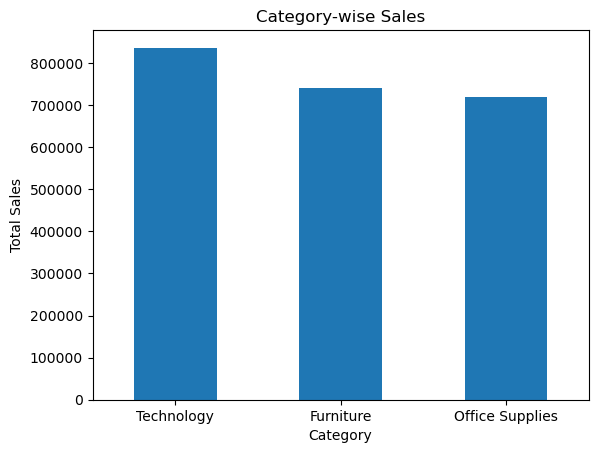

In [13]:
import matplotlib.pyplot as plt
category_sales.plot(kind='bar')
plt.title("Category-wise Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

## Region-wise Sales Analysis

In [14]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
region_sales

Region
West       725255.6365
East       678435.1960
Central    500782.8528
South      391721.9050
Name: Sales, dtype: float64

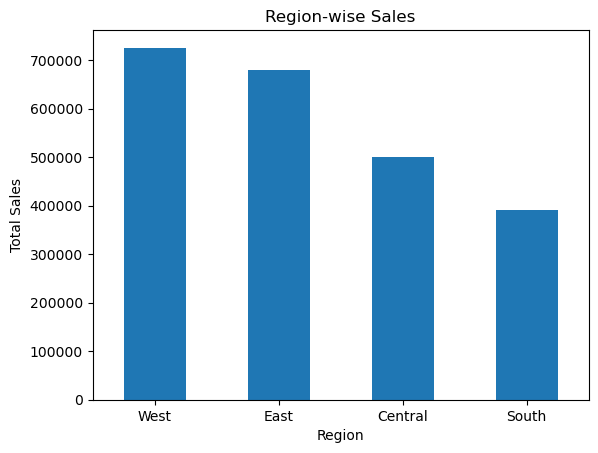

In [15]:
region_sales.plot(kind='bar')
plt.title("Region-wise Sales")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.show()

## Profit Analysis

In [16]:
category_profit = df.groupby('Category')['Profit'].sum().sort_values(ascending=False)
category_profit

Category
Technology         145454.9481
Office Supplies    122364.6608
Furniture           18421.8137
Name: Profit, dtype: float64

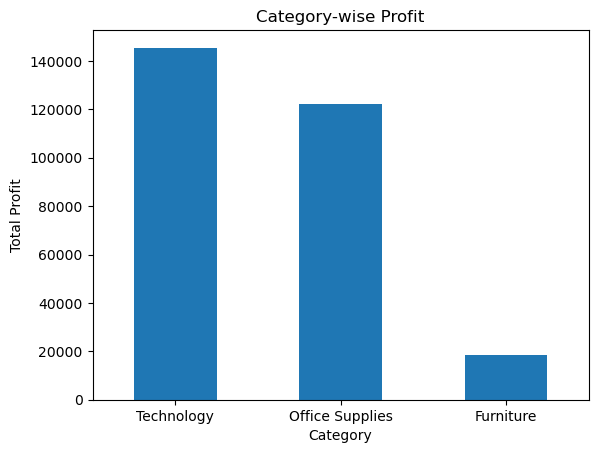

In [17]:
category_profit.plot(kind='bar')
plt.title("Category-wise Profit")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=0)
plt.show()

## Loss-making Sub-Category Analysis

In [18]:
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
loss_subcategories = subcat_profit[subcat_profit < 0]
loss_subcategories

Sub-Category
Tables      -17725.4811
Bookcases    -3472.5560
Supplies     -1189.0995
Name: Profit, dtype: float64

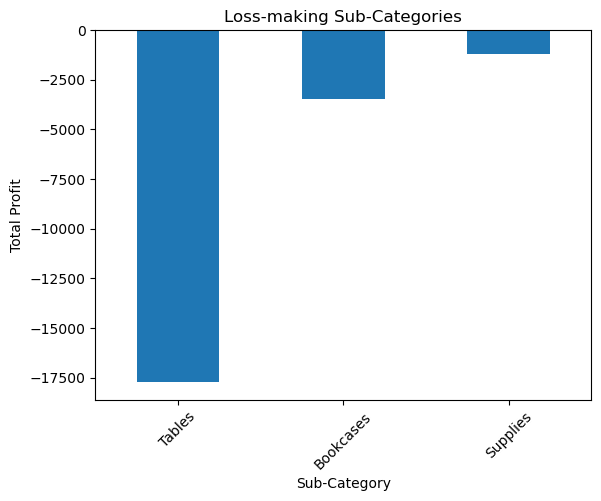

In [19]:
loss_subcategories.plot(kind='bar')
plt.title("Loss-making Sub-Categories")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()

## FINAL BUSINESS INSIGHTS

- The Technology category is the best-performing category in both sales and profit, making it the most valuable category for the business.
- Furniture, despite having high sales, is generating very low profit, which may be due to high discounts or operational costs.
- The West region is contributing the highest sales, followed by the East region, whereas the South region is performing relatively lower.
- Sub-categories like Tables, Bookcases, and Supplies are loss-making, which is affecting the profitability of the business.
- Loss-making sub-categories can help the business in implementing pricing optimization and cost control strategies.

## CONCLUSION

This project involved the analysis of retail sales data to determine trends in sales, profitability, and regional performance. Using Python and the pandas library, the data was cleaned, analyzed, and visualized to determine key business insights. The results of the analysis revealed the highly performing categories, the profitable regions, and the regions that are incurring losses in the sub-categories.